# Case Study On Unsupervised Learning

## Instructions

### Dataset Description:
You are provided with a dataset (force2020_data.csv)  with no target values

### Tasks:
#### Step 1: Load and Explore the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("force2020_data.csv")
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [3]:
df. describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [4]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [5]:
df. dtypes

RHOB        float64
GR          float64
DEPTH_MD    float64
NPHI        float64
PEF         float64
DTC         float64
dtype: object

In [6]:
df.shape

(18270, 6)

In [7]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [8]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns.duplicated().sum()

0

#### Step 2: Try K-Means Clustering on the data and visualize the output

In [11]:
# kmeans = KMeans(init="k-means++", n_clusters=2, random_state=2)
# kmeans.fit(df)
# centroids = kmeans.cluster_centers_
# label = kmeans.labels_
# unique_labels = np.unique(label)

# Within-Cluster Sum of Squares (WCSS)
# WCSS measures how well the data points are clustered around their respective centroids. 
# Definition: sum of the squared distances between each point and its cluster centroid
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

In [12]:
for i in wcss:
    print(round(i/10000000000,2))

1.18
0.3
0.13
0.08
0.05
0.03
0.03
0.02
0.02
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.0
0.0
0.0


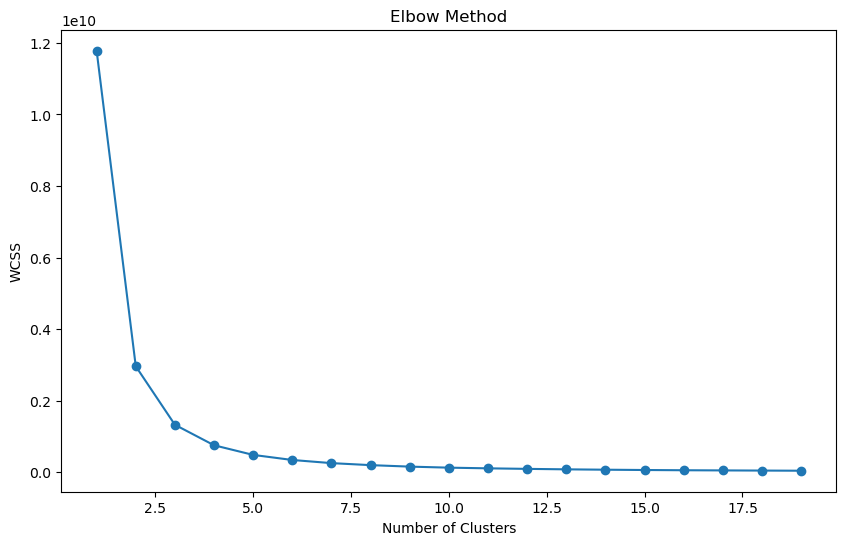

In [13]:
# plotting the elbow method
plt.figure(figsize = (10,6))
plt.plot(range(1,20), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(df)

# Adding cluster labels to the dataset
df['Cluster'] = y_kmeans
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180,0
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470,0
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615,0
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429,0
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342,0
...,...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,3.463851,125.106178,2
18266,2.643114,21.444370,3271.568,0.185574,3.463851,125.106178,2
18267,2.681300,22.646879,3271.720,0.176074,3.463851,125.106178,2
18268,2.738337,22.253584,3271.872,0.174617,3.463851,125.106178,2


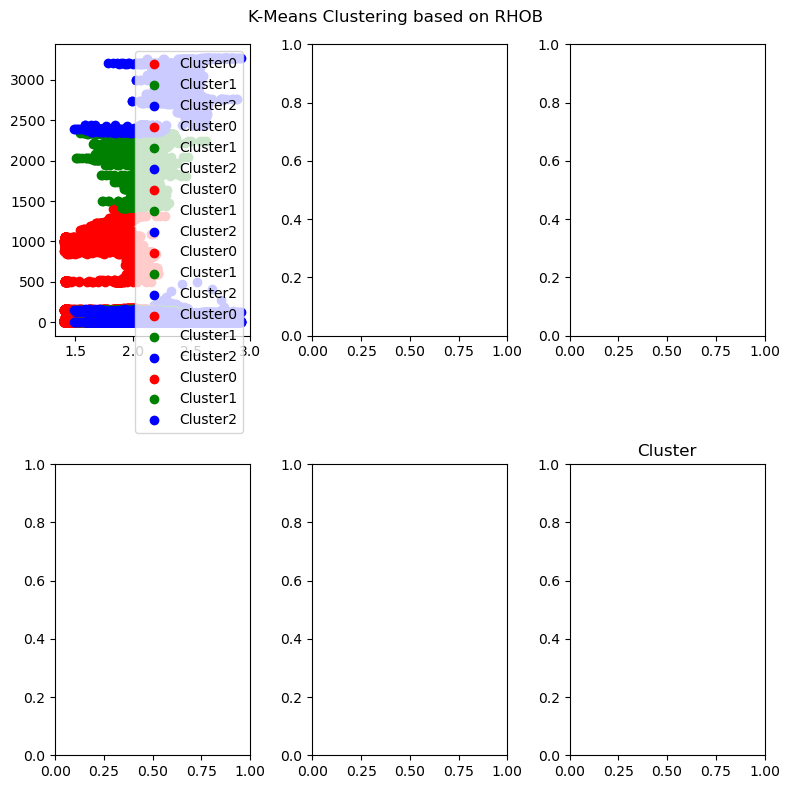

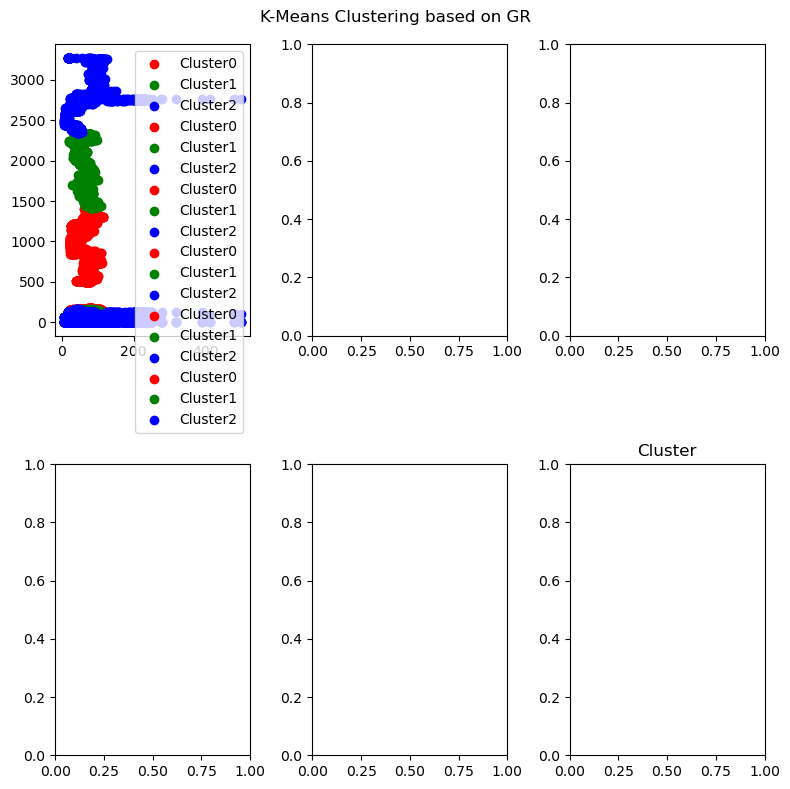

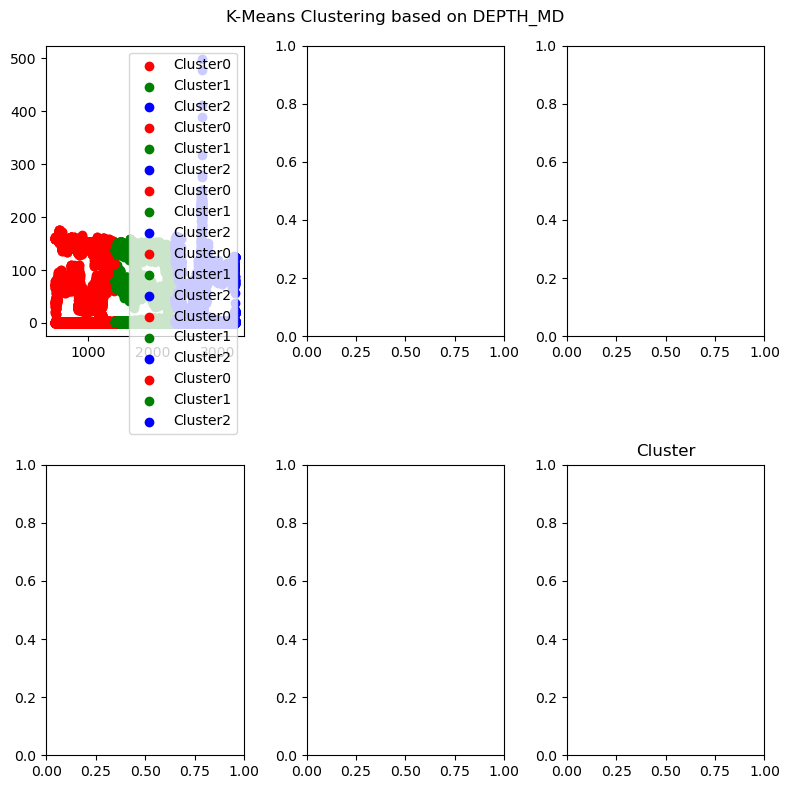

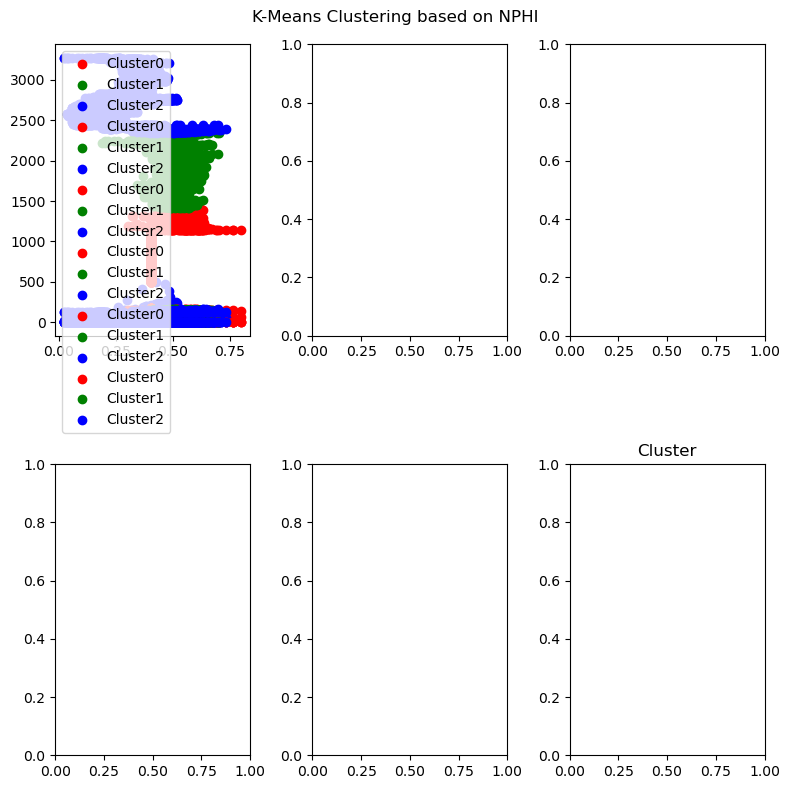

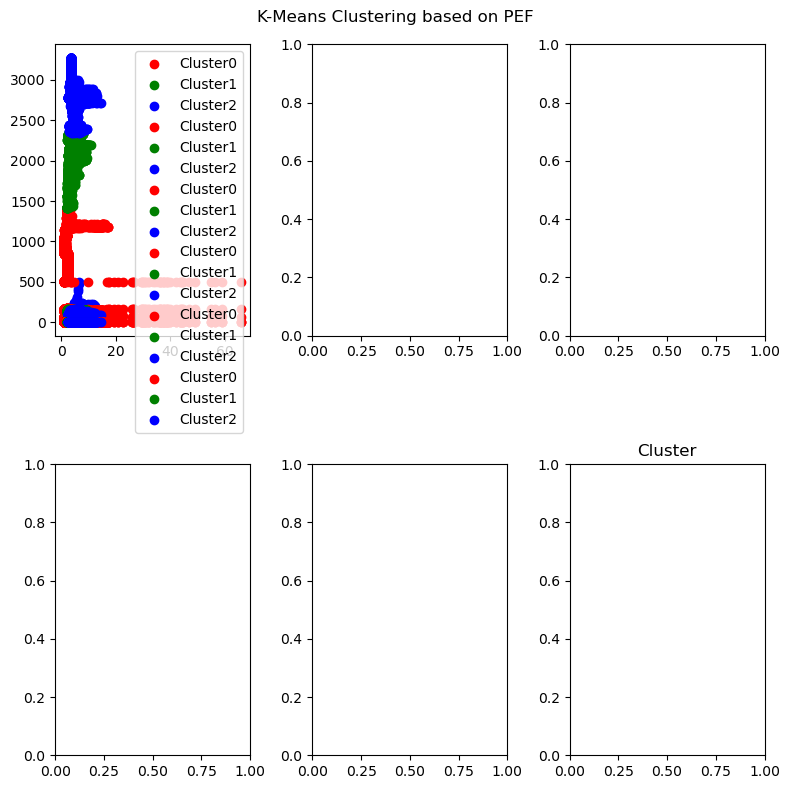

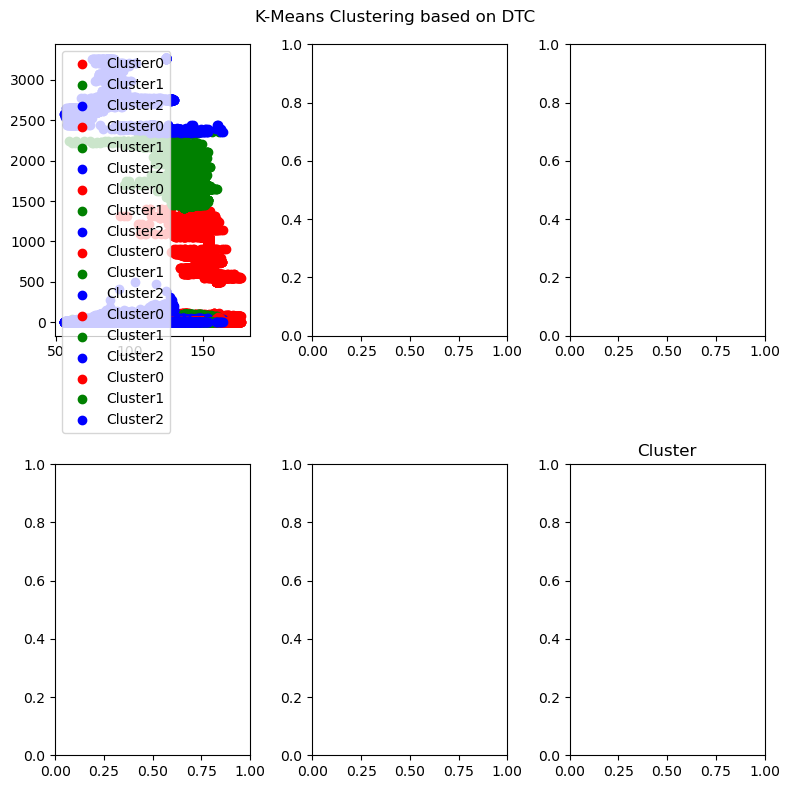

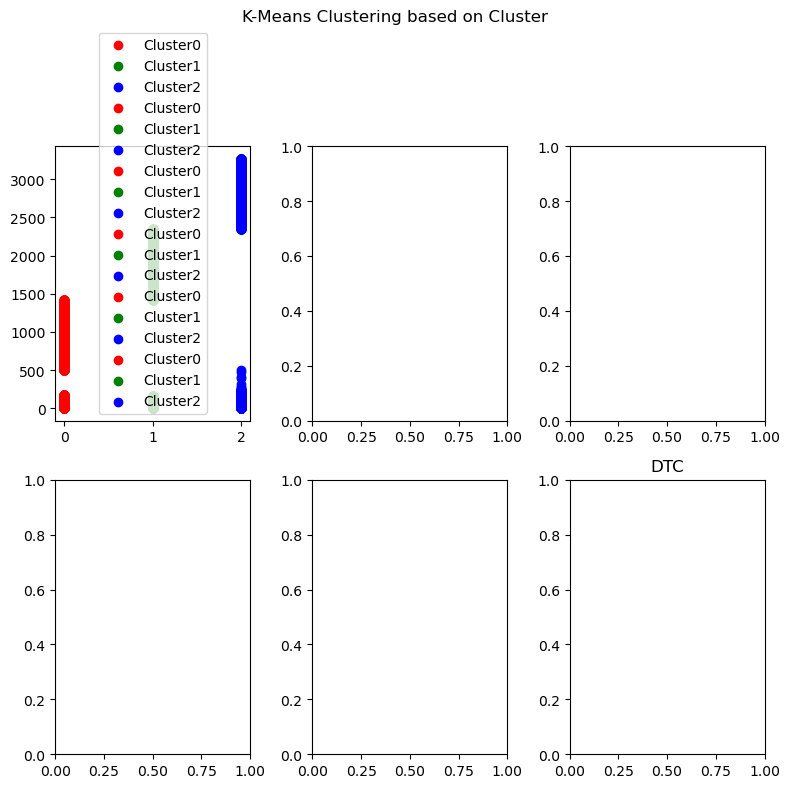

In [38]:
# plt.figure(figsize=(8, 8)) 
# for i in unique_labels: 
#     plt.scatter(df[label == i, 0], 
#                 df[label == i, 1], 
#                 label=i) 
# plt.scatter(centroids[:, 0], centroids[:, 1], 
#             marker='x', s=169, linewidths=3, 
#             color='k', zorder=10) 
# plt.legend() 
# plt.show() 


# assigning custom colors to clusters
colors = ['r','g','b']
cols = df.columns.tolist()


for j in range(len(cols)):
    m,n=0,0
    plot_count = 1
    fig, ax = plt.subplots(2,3, figsize=(8,8))
    for k in range(len(cols)):
        if(j!=k):
            # plt.subplot(2,3, plot_count)
            plt.title(cols[k])
            for i in range(3):
                cluster_data = df[y_kmeans ==i]
                # plt.scatter(cluster_data[cols[j]],
                #               cluster_data[cols[k]],
                #               c=colors[i],
                #               label = f'Cluster{i}')
                ax[m,n].scatter(cluster_data[cols[j]],
                              cluster_data[cols[k]],
                              c=colors[i],
                              label = f'Cluster{i}')
                ax[m,n].legend()
                if m!=1 and n==2:
                    m+=1
                    n=0
                else:
                    n+1
            plot_count +=1
    plt.suptitle('K-Means Clustering based on {}'.format(cols[j]))
    plt.tight_layout()
    plt.show()

#### Step 3: Experiment with different K values and plot the result

#### Step 4: Upload your completed Jupyter Notebook to GitHub and submit the link here 